# DL4NLP SS17 Home Exercise 01
----------------------------------

## Task 1 Setup (1P)
Install Python 3, numpy and Jupyter on your machine.

## Task 2 Perceptron Learning
### Task 2.1 Sigmoid Activation Function (1P)
When optimizing functions, first or higher-order derivatives (gradients, Hessians) are of major importance. In neural network learning, we typically want to minimize weight parameters so that the difference between the net output and the true labels is minimized, e.g.:

\begin{equation}
  \text{min}_\mathbf{w}\sum_{j=1}^N \Bigl(\sigma(\mathbf{x}_j \cdot \mathbf{w})-y_j\Bigr)^2
\end{equation}

Here, $\sigma$ is an activation function. A frequently used activation function is the *sigmoid* function, defined as:

\begin{equation}
  \text{sig}(x) = \frac{1}{1+\exp(-x)}
\end{equation}

Show that:

\begin{equation}
    \text{sig}'(x) = \text{sig}(x) \cdot \bigl(1-\text{sig}(x)\bigr)
\end{equation}

You may find the chain rule useful: $f(g(x))' = f'(g(x))\cdot g'(x)$

### Task 2.2 Perceptron Learning by Hand (2P)
A simple perceptron learning algorithm was introduced in the lecture (slide 88). Here is the weight update rule again for reference:
\begin{equation}
    w' \leftarrow w - \alpha \sum_{(\mathbf{x},y)\in\mathcal{T}'} \Bigl(\sigma(\mathbf{x} \cdot \mathbf{w}) - y\Bigr) \cdot \sigma'(\mathbf{x} \cdot \mathbf{w}) \cdot x^T
\end{equation}
The weight update rule is designed to minimize the square loss between the perceptron output and the target labels (see slide 87).

#### a) Training

Train a perceptron using the abovementioned algorithm and report the weight vector $w_j$ after each weight update. Run one epoch (one training pass over the training data) with the following parameters:
* activation function $\sigma = \text{sig}$ (see Task 2)
* initial weight vector $w_0 = (-1, 1)^T$
* learning rate $\alpha = 1$
* batch size $N'=1$, i.e. one weight vector update per data point $(\mathbf{x}, y)$
* training data $T$:

| $j$ | $x_1$ | $x_2$ | $y$ |
|----:|------:|------:|----:|
|  1  | -1.28 |  0.09 |  0  |
|  2  | 0.17  |  0.39 |  1  |
|  3  | 1.36  |  0.46 |  1  |
|  4  | -0.51 | -0.32 |  0  |

#### b) Evaluation

Compute the square loss $L$ before (using $w_0$) and after training (using $w_4$) on the following test data:

| $j$ | $x_1$ | $x_2$ | $y$ |
|----:|------:|------:|----:|
|  1  | -0.50 | -1.00 |  0  |
|  2  |  0.75 |  0.25 |  1  |

Square loss is defined as (see Task 2 and slide 87):
\begin{equation}
    L = \sum_{j=1}^N \ell(\mathbf{x}_j, y) = \sum_{j=1}^N (\sigma(\mathbf{x}_j \cdot \mathbf{w}) - y_j)^2
\end{equation}

### Task 2.3 Decision Boundary and Plotting (1P)
A perceptron learns a linear decision boundary. The activation function $\sigma(\mathbf{x} \cdot \mathbf{w})$ used throughout this exercise corresponds to a decision boundary $x_1 \cdot w_1 + x_2 \cdot w_2 = 0$ (Hesse normal form).

Create a plot with [matplotlib](https://matplotlib.org/contents.html) that shows:
* the training and test data points from Task 2.2
* the decision boundaries before and after training

# Answer:
## Task 2.1

Given that
\begin{equation}
  \text{sig}(x) = \frac{1}{1+\exp(-x)}
\end{equation}

We have:
\begin{equation}
    \frac{d \text{sig}(x)}{dx} =-\lgroup{\frac{1}{1+\exp(-x)})^2} \frac{d}{dx}(1+\exp(-x)) \\
    = \lgroup{\frac{1}{1+\exp(-x)})^2} \exp(-x)\\
    =\lgroup{\frac{1}{1+\exp(-x)})}\lgroup{1-\frac{1}{1+\exp(-x)})}
\end{equation}


Which is:
\begin{equation}
    \text{sig}'(x) = \text{sig}(x) \cdot \bigl(1-\text{sig}(x)\bigr)
\end{equation}

## Task 2.2

In [160]:
import numpy as np
import matplotlib.pyplot as plt
w0 = np.matrix('-1,1')
x_train = np.matrix('-1.28,0.09;0.17,0.39;1.36,0.46;-0.51,-0.32')
y_train = np.matrix('0;1;1;0')
x_test = np.matrix('-0.50,-1.00;0.75,0.25')
y_test = np.matrix('0;1')
alpha = 1
N = 1
%matplotlib inline

In [161]:
# define function and update rule here
# sigmoid function 
def sig(x):
    return 1 / (1 + np.exp(-x))
    
# derivative of sigmoid
def dsig(x):
    return np.multiply(sig(x),(x/x-sig(x)))

# update of weights
def update(w_old,x,y,alpha):
    y_pred = sig(np.matmul(x,w_old.T))
    w_new = w_old - alpha*(y_pred - y)*dsig(y_pred)*x
    return w_new

# Loss
def square_loss(y_true,y_pred):
    loss = np.multiply(y_pred-y_true,y_pred-y_true)
    return np.sum(loss)


In [162]:
# Training
for idx in range(4):
    w_new = update(w_old,x_train[idx],y_train[idx],alpha)
    w_old = w_new

In [163]:
# Testing
# before training
y_before = sig(np.matmul(x_test,w0.T)) 
square_loss(y_before,y_test)

0.52999257559681101

In [164]:
# after training
y_after = sig(np.matmul(x_test,w_new.T)) 
square_loss(y_after,y_test)

0.13250542042046487

## Tast 2.3

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


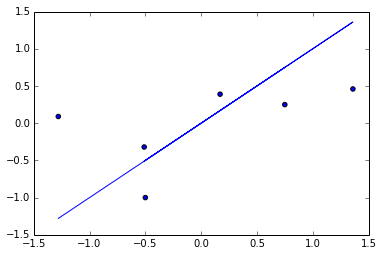

In [165]:
# Boundary before training
x1 = np.zeros(6)
x2_origin = np.zeros(6)
x1[0:4] = x_train.T[0]
x1[4:6] = x_test.T[0]
x2_origin[0:4] = x_train.T[1]  # since we have 6 samples here, and they share the same weights. 
                            # The plot based on 6 points is same as that based on 2, 3, 4, or 5 points
x2_origin[4:6] = x_test.T[1]
x2 = - w0[0,0]/w0[0,1] * x1
plt.plot(x1,x2)
plt.scatter(x1,x2_origin)
plt.show()

/usr/lib/python3/dist-packages/matplotlib/collections.py:549: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


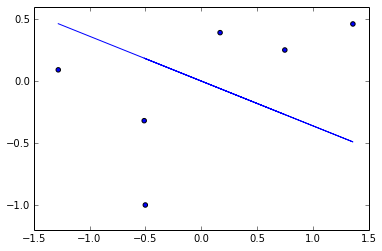

In [166]:
# Boundary after training
x1 = np.zeros(6)
x2_origin = np.zeros(6)
x1[0:4] = x_train.T[0]
x1[4:6] = x_test.T[0]
x2_origin[0:4] = x_train.T[1] # since we have 6 samples here, and they share the same weights. 
                            # The plot based on 6 points is same as that based on 2, 3, 4, or 5 points
x2_origin[4:6] = x_test.T[1]
x2 = - w_new[0,0]/w_new[0,1] * x1
plt.plot(x1,x2)
plt.scatter(x1,x2_origin)
plt.show()

We can see the boundaies above. Obviously, the boundary after training is better than before training. Because the margin between two classes are lager after training.